# Driving14x14WideRoundAbout-n2-v0 Experiment analysis

In [1]:
import copy
import os.path as osp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import posggym_agents

import baposgmcp.plot as plot_utils
import baposgmcp.plot.paper as paper_utils
from baposgmcp.config import BASE_REPO_DIR

baposgmcp_results_file = osp.join(
    BASE_REPO_DIR, 
    "experiments", 
    "Driving14x14WideRoundAbout-n2-v0", 
    "results", 
    "meta_pi_experiment_results.csv"
)
figure_dir = osp.join(BASE_REPO_DIR, "experiments", "Driving14x14WideRoundAbout-n2-v0", "figures")
policy_results_file = osp.join(
    posggym_agents.config.BASE_DIR, 'agents', "driving14x14wideroundabout_n2_v0", "results", "klrbr_results.csv"
)

## Define Co-Player Prior

In [2]:
# Uniform
# Note K4 is not in prior 
policy_prior = {1: {
    'klr_k0_seed0-v0': 0.25,
    'klr_k1_seed0-v0': 0.25,
    'klr_k2_seed0-v0': 0.25,
    'klr_k3_seed0-v0': 0.25,
}}
coplayer_policy_ids = list(policy_prior[1])
print(coplayer_policy_ids)

['klr_k0_seed0-v0', 'klr_k1_seed0-v0', 'klr_k2_seed0-v0', 'klr_k3_seed0-v0']


## Loading Heuristic Policy Data

In [3]:
policy_df = plot_utils.import_results(
    policy_results_file, clean_policy_id=True, add_coplayer_policy_id=True
)

all_fixed_policy_ids = policy_df["policy_id"].unique().tolist()
all_fixed_policy_ids.sort()
print("All Policies")
print("------------")
for pi_id in all_fixed_policy_ids:
    print("  ", pi_id)
    
# Drop unneeded co-player policies
policies_to_keep = list(policy_prior[1]) + ["klr_k4_seed0-v0"]
policy_df = policy_df[policy_df["policy_id"].isin(policies_to_keep)]

fixed_policy_ids = policy_df["policy_id"].unique().tolist()
fixed_policy_ids.sort()
print("\nFixed Policies")
print("--------------")
for pi_id in fixed_policy_ids:
    print("  ", pi_id)

print("\nColumns")
print("-------")
for c in policy_df.columns:
    print("  ", c)

All Policies
------------
   klr_k0_seed0-v0
   klr_k0_seed1-v0
   klr_k0_seed2-v0
   klr_k0_seed3-v0
   klr_k0_seed4-v0
   klr_k1_seed0-v0
   klr_k1_seed1-v0
   klr_k1_seed2-v0
   klr_k1_seed3-v0
   klr_k1_seed4-v0
   klr_k2_seed0-v0
   klr_k2_seed1-v0
   klr_k2_seed2-v0
   klr_k2_seed3-v0
   klr_k2_seed4-v0
   klr_k3_seed0-v0
   klr_k3_seed1-v0
   klr_k3_seed2-v0
   klr_k3_seed3-v0
   klr_k3_seed4-v0
   klr_k4_seed0-v0
   klr_k4_seed1-v0
   klr_k4_seed2-v0
   klr_k4_seed3-v0
   klr_k4_seed4-v0
   klrbr_k4_seed0-v0
   klrbr_k4_seed1-v0
   klrbr_k4_seed2-v0
   klrbr_k4_seed3-v0
   klrbr_k4_seed4-v0
   uniform_random-v0

Fixed Policies
--------------
   klr_k0_seed0-v0
   klr_k1_seed0-v0
   klr_k2_seed0-v0
   klr_k3_seed0-v0
   klr_k4_seed0-v0

Columns
-------
   exp_id
   agent_id
   env_id
   policy_id
   exp_seed
   num_episodes
   episode_return_mean
   episode_return_std
   episode_return_max
   episode_return_min
   episode_steps_mean
   episode_steps_std
   episode_time_mean
   e

## Heuristic policies pairwise performance

This is what was used to generate the meta-policies.

/home/jonathon/code/ba-posgmcp/baposgmcp/plot/pairwise.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pw_values[row_policy_idx][col_policy_idx] = group.mean()[y_key]
/home/jonathon/code/ba-posgmcp/baposgmcp/plot/pairwise.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pw_values[row_policy_idx][col_policy_idx] = group.mean()[y_key]


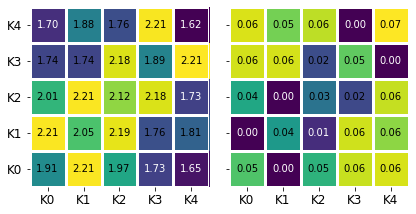

In [4]:
fig, axs = plot_utils.plot_pairwise_comparison(
    policy_df,
    y_key="episode_return_mean", 
    policy_key="policy_id",
    y_err_key="episode_return_CI",
    vrange=None, 
    figsize=(6, 3), 
    valfmt="{x:.2f}",
    policies=fixed_policy_ids,
    coplayer_policies=fixed_policy_ids,
    policy_labels={
        "klr_k0_seed0-v0": "K0",
        "klr_k1_seed0-v0": "K1",
        "klr_k2_seed0-v0": "K2",
        "klr_k3_seed0-v0": "K3",
        "klr_k4_seed0-v0": "K4"
    },
    average_duplicates=True,
    duplicate_warning=False
)
fig.savefig(osp.join(figure_dir, "fixed_policy_payoffs.png"))

## Add Full-Knowledge Best-Response baseline

In [5]:
best_response_map = {
    "klr_k0_seed0-v0": "klr_k1_seed0-v0",
    "klr_k1_seed0-v0": "klr_k2_seed0-v0",
    "klr_k2_seed0-v0": "klr_k3_seed0-v0",
    "klr_k3_seed0-v0": "klr_k4_seed0-v0",
    # FYI K4 is added but is not used in expected results, 
    # since K4 not in other policy prior
    "klr_k4_seed0-v0": "klr_k3_seed0-v0",
}

new_rows = []
for coplayer_policy_id, br_policy_id in best_response_map.items():
    next_exp_id = policy_df["exp_id"].max() + 1
    br_row = policy_df.loc[
        # use results from agent 0 so it's the same as BA-POSGMCP and other baseline results
        (policy_df["agent_id"] == 0)
        & (policy_df["policy_id"] == br_policy_id) 
        & (policy_df["coplayer_policy_id"] == coplayer_policy_id)
    ].copy()
    br_coplayer_row = policy_df.loc[
        (policy_df["agent_id"] == 1)
        & (policy_df["exp_id"].isin(br_row["exp_id"]))
    ].copy()
    # update policy id to baseline name
    br_row["policy_id"] = "full-knowledge-br"
    # update exp ids to avoid duplicates
    br_row["exp_id"] = next_exp_id
    br_coplayer_row["exp_id"] = next_exp_id
    new_rows.append(br_row)
    new_rows.append(br_coplayer_row)

print(len(new_rows))
br_df = pd.concat(new_rows, axis='rows').reset_index(drop=True)
print(len(br_df))
policy_br_df = pd.concat([policy_df, br_df], ignore_index=True)

print(len(policy_br_df))
policy_br_df[policy_br_df["policy_id"] == "full-knowledge-br"]
    

10
10
220


,exp_id,agent_id,env_id,policy_id,exp_seed,num_episodes,episode_return_mean,episode_return_std,episode_return_max,episode_return_min,...,episode_return_CI,episode_steps_CI,episode_time_CI,prop_LOSS,prop_DRAW,prop_WIN,prop_NA,num_sims,truncated,coplayer_policy_id
210,238,0,Driving14x14WideRoundAbout-n2-v0,full-knowledge-br,0,1000,2.20970,0.069720,2.3,2.1,...,0.004321,0.116152,0.038302,0.000,0.0,1.000,0.0,0,False,klr_k0_seed0-v0
212,238,0,Driving14x14WideRoundAbout-n2-v0,full-knowledge-br,0,1000,2.21225,0.070869,2.3,2.1,...,0.004393,0.217854,0.036358,0.000,0.0,1.000,0.0,0,False,klr_k1_seed0-v0
214,238,0,Driving14x14WideRoundAbout-n2-v0,full-knowledge-br,0,1000,2.18125,0.298297,2.3,-0.6,...,0.018489,0.133130,0.039960,0.011,0.0,0.989,0.0,0,False,klr_k2_seed0-v0
216,238,0,Driving14x14WideRoundAbout-n2-v0,full-knowledge-br,0,1000,2.21325,0.068498,2.3,2.1,...,0.004246,0.102640,0.043274,0.000,0.0,1.000,0.0,0,False,klr_k3_seed0-v0
218,238,0,Driving14x14WideRoundAbout-n2-v0,full-knowledge-br,0,1000,2.21435,0.069689,2.3,2.1,...,0.004319,0.104956,0.043259,0.000,0.0,1.000,0.0,0,False,klr_k4_seed0-v0


## Loading BAPOSGMCP Data

In [6]:
baposgmcp_df = plot_utils.import_results(
    baposgmcp_results_file, clean_policy_id=True, add_coplayer_policy_id=True
)

policy_ids = baposgmcp_df["policy_id"].unique().tolist()
policy_ids.sort()
print("Policies")
print("--------")
for pi_id in policy_ids:
    print("  ", pi_id)

print("\nColumns")
print("-------")
for c in baposgmcp_df.columns:
    print("  ", f'"{c}",')

Policies
--------
   baposgmcp-fixed_piklrk0seed0-v0_numsims2_truncatedTrue
   baposgmcp-fixed_piklrk0seed0-v0_numsims5_truncatedTrue
   baposgmcp-fixed_piklrk1seed0-v0_numsims2_truncatedTrue
   baposgmcp-fixed_piklrk1seed0-v0_numsims5_truncatedTrue
   baposgmcp-fixed_piklrk2seed0-v0_numsims2_truncatedTrue
   baposgmcp-fixed_piklrk2seed0-v0_numsims5_truncatedTrue
   baposgmcp-fixed_piklrk3seed0-v0_numsims2_truncatedTrue
   baposgmcp-fixed_piklrk3seed0-v0_numsims5_truncatedTrue
   baposgmcp-fixed_piklrk4seed0-v0_numsims2_truncatedTrue
   baposgmcp-fixed_piklrk4seed0-v0_numsims5_truncatedTrue
   baposgmcp-random_numsims2_truncatedFalse
   baposgmcp-random_numsims5_truncatedFalse
   baposgmcp_metagreedy_numsims2_truncatedTrue
   baposgmcp_metagreedy_numsims5_truncatedTrue
   baposgmcp_metasoftmax_numsims2_truncatedFalse
   baposgmcp_metasoftmax_numsims2_truncatedTrue
   baposgmcp_metasoftmax_numsims5_truncatedFalse
   baposgmcp_metasoftmax_numsims5_truncatedTrue
   baposgmcp_metauniform_n

## Combine data

In [7]:
# First need to update exp_ids of one dataframe so there are no duplicate exp_ids
df1 = baposgmcp_df
df2 = policy_br_df

df1_max_exp_id = df1["exp_id"].max()
if df2["exp_id"].min() <= df1_max_exp_id:
    df2["exp_id"] += df1_max_exp_id+1

combined_df = pd.concat([df1, df2]).reset_index(drop = True)

def add_alg_id(row):
    pi_id = row["policy_id"]
    if pi_id.startswith("klr"):
        return "fixed"
    tokens = pi_id.split("_")
    alg_id = "_".join([
        t for t in tokens 
        if all(
            s not in t for s in [
                "actionselection", "numsims", "truncated", "greedy", "softmax", "uniform", "piklr"
            ]
        )
    ])
    return alg_id


def add_meta_pi(row):
    pi_id = row["policy_id"]
    for meta_pi in ["greedy", "softmax", "uniform"]:
        if meta_pi in pi_id:
            return meta_pi
    return "NA"


combined_df["alg_id"] = combined_df.apply(add_alg_id, axis=1)
combined_df["meta_pi"] = combined_df.apply(add_meta_pi, axis=1)

print(combined_df["action_selection"].unique())
    
policy_ids = combined_df["policy_id"].unique().tolist()
policy_ids.sort()
print("Policies")
print("--------")
for pi_id in policy_ids:
    print(f'    "{pi_id}",')
    
alg_ids = combined_df["alg_id"].unique().tolist()
alg_ids.sort()
print("\nAlg IDs")
print("-------")
for n in alg_ids:
    print("  ", n)
    
print("\nMeta Pis:")
print("---------")
print(combined_df["meta_pi"].unique().tolist())

print("\nColumns")
print("-------")
for c in combined_df.columns:
    print("  ", c)

['ucb' 'pucb' nan 'None']
Policies
--------
    "baposgmcp-fixed_piklrk0seed0-v0_numsims2_truncatedTrue",
    "baposgmcp-fixed_piklrk0seed0-v0_numsims5_truncatedTrue",
    "baposgmcp-fixed_piklrk1seed0-v0_numsims2_truncatedTrue",
    "baposgmcp-fixed_piklrk1seed0-v0_numsims5_truncatedTrue",
    "baposgmcp-fixed_piklrk2seed0-v0_numsims2_truncatedTrue",
    "baposgmcp-fixed_piklrk2seed0-v0_numsims5_truncatedTrue",
    "baposgmcp-fixed_piklrk3seed0-v0_numsims2_truncatedTrue",
    "baposgmcp-fixed_piklrk3seed0-v0_numsims5_truncatedTrue",
    "baposgmcp-fixed_piklrk4seed0-v0_numsims2_truncatedTrue",
    "baposgmcp-fixed_piklrk4seed0-v0_numsims5_truncatedTrue",
    "baposgmcp-random_numsims2_truncatedFalse",
    "baposgmcp-random_numsims5_truncatedFalse",
    "baposgmcp_metagreedy_numsims2_truncatedTrue",
    "baposgmcp_metagreedy_numsims5_truncatedTrue",
    "baposgmcp_metasoftmax_numsims2_truncatedFalse",
    "baposgmcp_metasoftmax_numsims2_truncatedTrue",
    "baposgmcp_metasoftmax_numsim

## Pairwise performance

Here we look at the performance of each policy against each other policy including BAPOSGMCP and baselines with different number of simulations, action selection, and meta-policies.

/home/jonathon/code/ba-posgmcp/baposgmcp/plot/pairwise.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pw_values[row_policy_idx][col_policy_idx] = group.mean()[y_key]
/home/jonathon/code/ba-posgmcp/baposgmcp/plot/pairwise.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pw_values[row_policy_idx][col_policy_idx] = group.mean()[y_key]


(<Figure size 1440x2520 with 2 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

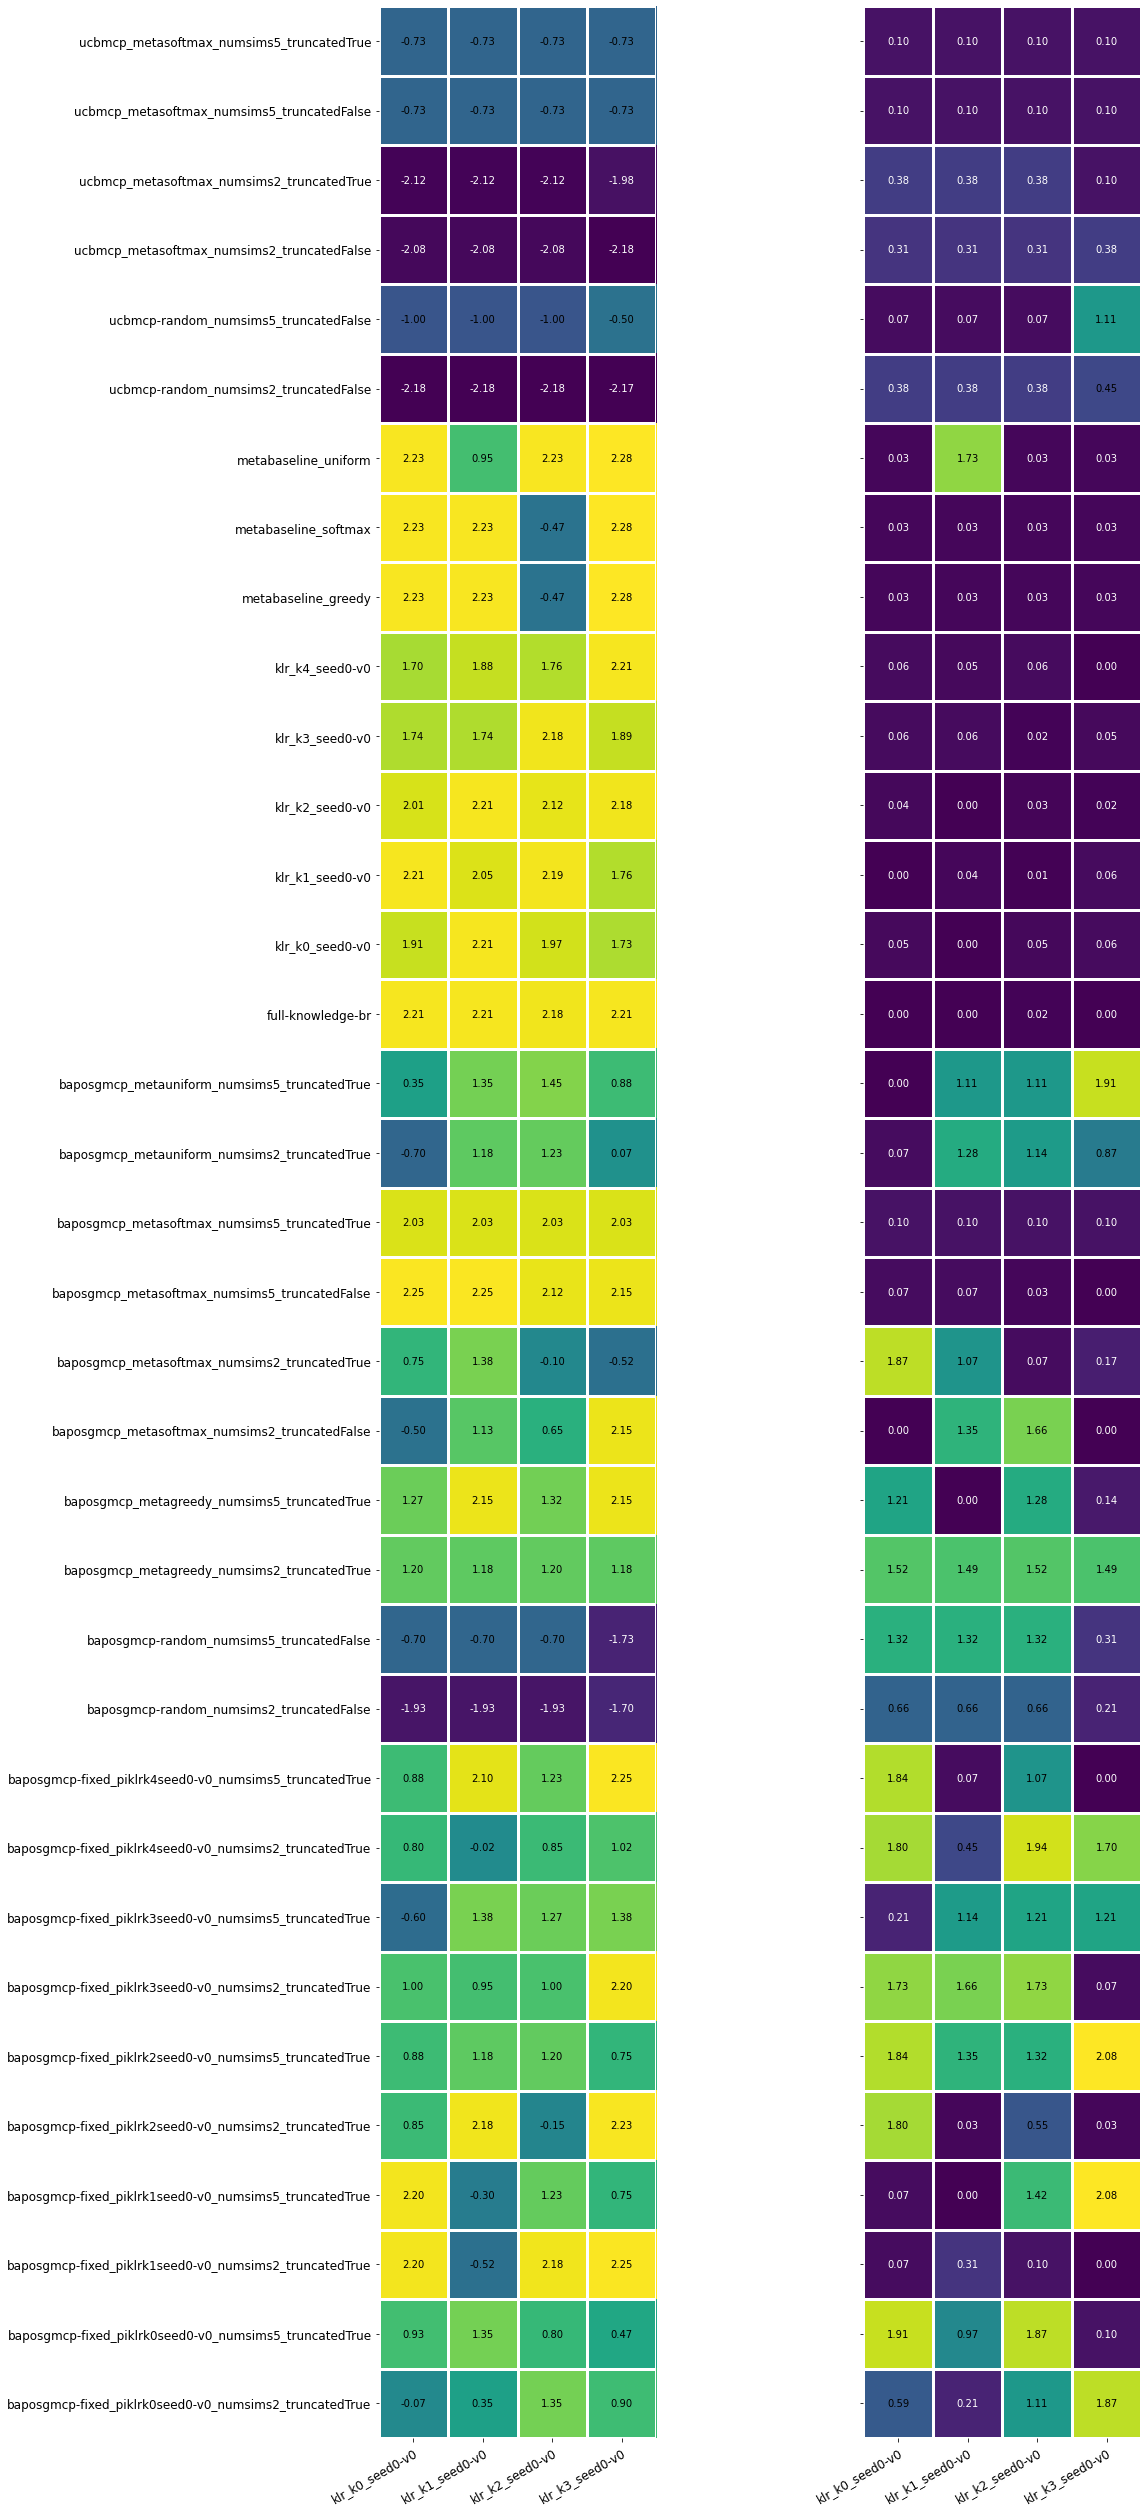

In [8]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    y_key="episode_return_mean", 
    policy_key="policy_id",
    y_err_key="episode_return_CI",
    vrange=None, 
    figsize=(20, len(combined_df["policy_id"].unique())), 
    valfmt="{x:.2f}",
    coplayer_policies=coplayer_policy_ids,
    average_duplicates=True,
    duplicate_warning=False
)

/home/jonathon/code/ba-posgmcp/baposgmcp/plot/pairwise.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pw_values[row_policy_idx][col_policy_idx] = group.mean()[y_key]


(<Figure size 1440x2520 with 1 Axes>, array([[<AxesSubplot:>]], dtype=object))

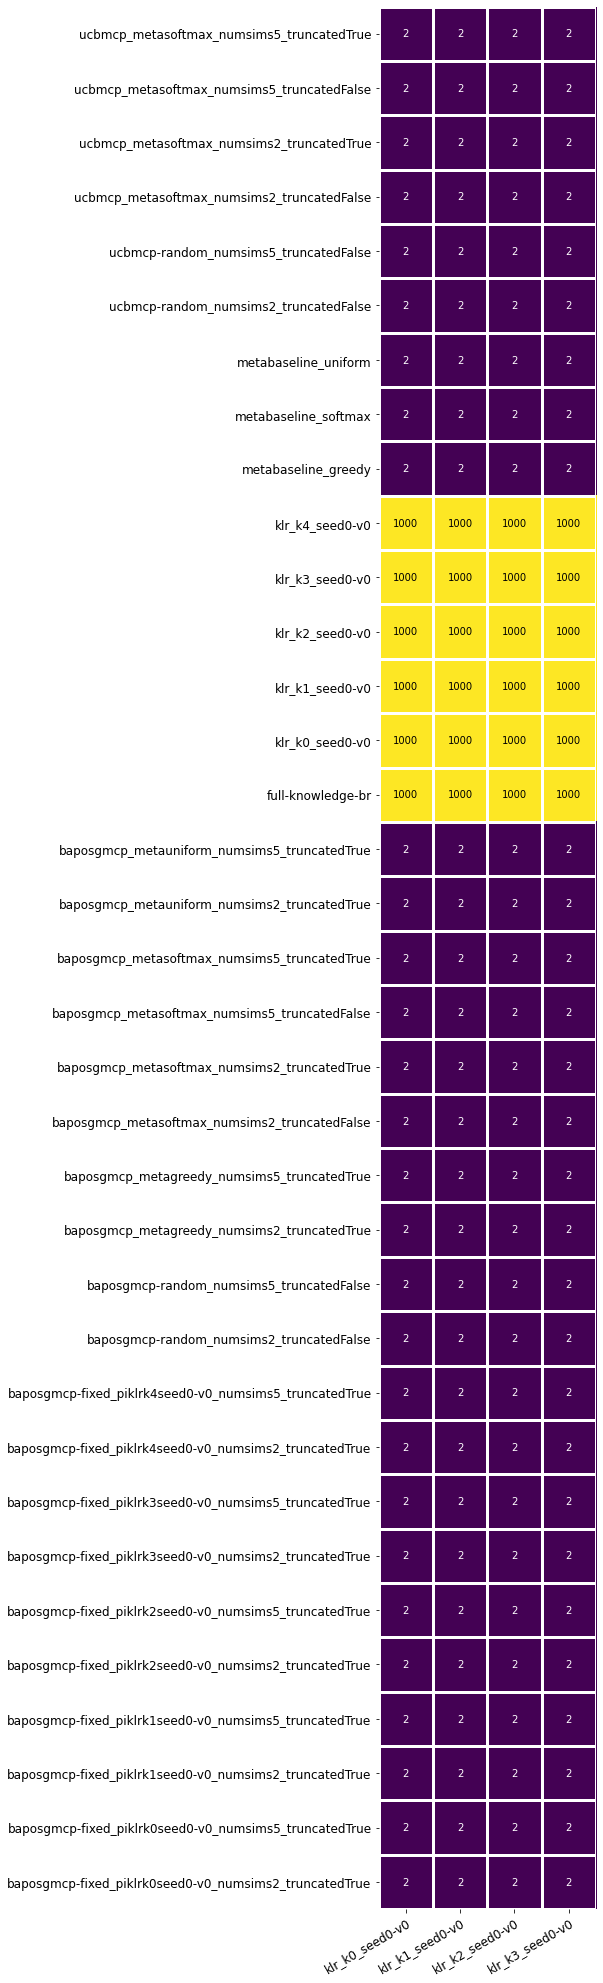

In [9]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    y_key="num_episodes", 
    policy_key="policy_id",
    y_err_key=None,
    vrange=None, 
    figsize=(20, len(combined_df["policy_id"].unique())), 
    valfmt="{x:.0f}",
    coplayer_policies=coplayer_policy_ids,
    average_duplicates=True,
    duplicate_warning=False
)

# Expected Performance

Here we look at the expected performance given the policy prior of BAPOSGMCP and the different baselines.

Specifically:

1. Comparing different meta-policies
2. Comparing different action selection strategies
3. Comparing using value function (truncated) vs rollout (untruncated) leaf node evaluation
4. 

In [10]:
exp_df = plot_utils.get_uniform_expected_df(
    combined_df, 
    coplayer_policies=coplayer_policy_ids,
    coplayer_policy_key="coplayer_policy_id"
)

Ungrouped size = 164
Grouped size = 35


In [11]:
# Base plot kwargs
base_plot_kwargs = paper_utils.get_base_plot_kwargs()
return_plot_kwargs = copy.deepcopy(base_plot_kwargs)
return_plot_kwargs["subplot_kwargs"].update({
    "ylabel": "Mean Episode Return",
})

step_plot_kwargs = copy.deepcopy(return_plot_kwargs)
step_plot_kwargs["subplot_kwargs"].update({
    "ylabel": "Mean Episode Steps"
})

## Comparison of the different Meta-Policies

Here we look at the performance of our algorithm using the difference meta-policies.

Looking at performance with:

- truncated search
- using PUCB

We also look at the performance of the metabaseline with the different meta-policies.

In [12]:
meta_pi_label_map = {
    "greedy": r"$\sigma^{G}$",
    "softmax": r"$\sigma^{S}$",
    "uniform": r"$\sigma^{U}$",
}

meta_pi_df = exp_df[
    (exp_df["action_selection"].isin(["pucb", None]))
    & (
        (exp_df["alg_id"].isin(["metabaseline"]))
        | (
            (exp_df["alg_id"].isin(["baposgmcp"])) & (exp_df["truncated"] == True)
        )
    )
]

meta_alg_ids = meta_pi_df["alg_id"].unique().tolist()
meta_alg_ids.sort()
print("Alg IDs")
print("-------")
for n in meta_alg_ids:
    print(n)
    
policy_ids = meta_pi_df["policy_id"].unique().tolist()
policy_ids.sort()
print("\nPolicy IDs")
print("----------")
for n in policy_ids:
    print(n)

Alg IDs
-------
baposgmcp
metabaseline

Policy IDs
----------
baposgmcp_metagreedy_numsims2_truncatedTrue
baposgmcp_metagreedy_numsims5_truncatedTrue
baposgmcp_metasoftmax_numsims2_truncatedTrue
baposgmcp_metasoftmax_numsims5_truncatedTrue
baposgmcp_metauniform_numsims2_truncatedTrue
baposgmcp_metauniform_numsims5_truncatedTrue
metabaseline_greedy
metabaseline_softmax
metabaseline_uniform


baposgmcp
metabaseline


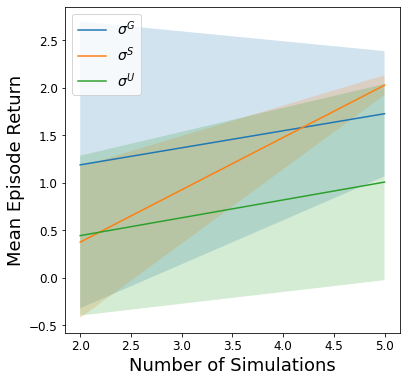

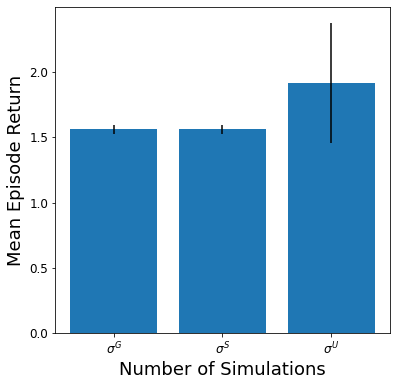

In [13]:
plot_kwargs = copy.deepcopy(return_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    # "ylim": (1.5, 2.3),
})
plot_kwargs["legend_kwargs"].update({
    # "loc": "lower right",
    # "title": "Meta-Policy" 
})

for alg_id in meta_alg_ids:
    print(alg_id)
    fig, _ = plot_utils.paper.plot_multiple_meta_policy_vs_num_sims(
        meta_pi_df[meta_pi_df["alg_id"] == alg_id],
        y_key="episode_return_mean",
        y_err_key="episode_return_CI",
        meta_pi_label_map=meta_pi_label_map,
        alg_id_key="alg_id",
        set_title=False,
        **plot_kwargs
    )
    fig.savefig(osp.join(figure_dir, f"meta_pi_return_{alg_id}.png"))
    
del plot_kwargs

## Action Selection

Compare performance between the different action selection strategies.

Specifically looking at:

- UCB vs PUCB

For truncated and rollouts (untruncated) and also using Meta vs Random search policies.

In [14]:
exp_df["action_selection"].unique()

array(['pucb', None, 'ucb'], dtype=object)

In [15]:
act_sel_label_map = {
    ("baposgmcp", "pucb"): "PUCB + Meta",
    ("baposgmcp-random", "pucb"): "PUCB + Random",
    ("ucbmcp", "ucb"): "UCB + Meta",
    ("ucbmcp-random", "ucb"): "UCB + Random",
}

act_sel_df = exp_df[
    (exp_df["action_selection"].isin(['pucb', 'ucb']))
    & (exp_df["meta_pi"].isin(["softmax", "NA"]))
    & (exp_df["alg_id"].isin(["baposgmcp", "baposgmcp-random", "ucbmcp", "ucbmcp-random"]))
]

act_sel_alg_ids = act_sel_df["alg_id"].unique().tolist()
act_sel_alg_ids.sort()
print("Alg IDs")
print("-------")
for n in act_sel_alg_ids:
    print(n)
    
policy_ids = act_sel_df["policy_id"].unique().tolist()
policy_ids.sort()
print("\nPolicy IDs")
print("----------")
for n in policy_ids:
    print(n)

Alg IDs
-------
baposgmcp
baposgmcp-random
ucbmcp
ucbmcp-random

Policy IDs
----------
baposgmcp-random_numsims2_truncatedFalse
baposgmcp-random_numsims5_truncatedFalse
baposgmcp_metasoftmax_numsims2_truncatedFalse
baposgmcp_metasoftmax_numsims2_truncatedTrue
baposgmcp_metasoftmax_numsims5_truncatedFalse
baposgmcp_metasoftmax_numsims5_truncatedTrue
ucbmcp-random_numsims2_truncatedFalse
ucbmcp-random_numsims5_truncatedFalse
ucbmcp_metasoftmax_numsims2_truncatedFalse
ucbmcp_metasoftmax_numsims2_truncatedTrue
ucbmcp_metasoftmax_numsims5_truncatedFalse
ucbmcp_metasoftmax_numsims5_truncatedTrue


In [16]:
from itertools import product

def plot_action_selection_vs_num_sims(plot_df: pd.DataFrame,
                                      ax,
                                      y_key: str,
                                      y_err_key: str,
                                      alg_id_key="alg_id",
                                      act_sel_key="action_selection",
                                      label_map=None):
    """Plot expected values for action selction strategies by num_sims."""
    if not label_map:
        label_map = {}

    alg_ids = plot_df[alg_id_key].unique().tolist()
    alg_ids.sort()

    all_act_sel = plot_df[act_sel_key].unique().tolist()
    all_act_sel.sort()

    for alg_id, act_sel in product(alg_ids, all_act_sel):
        a_df = plot_df[
            (plot_df[act_sel_key] == act_sel)
            & (plot_df[alg_id_key] == alg_id)
        ]
        if len(a_df) == 0:
            continue

        a_df = a_df.sort_values(by="num_sims")
        x = a_df["num_sims"]
        y = a_df[y_key]
        y_err = a_df[y_err_key]
    
        ax.plot(x, y, label=label_map.get((alg_id, act_sel), f"{alg_id} - {act_sel}"))
        ax.fill_between(x, y-y_err, y+y_err, alpha=0.2)

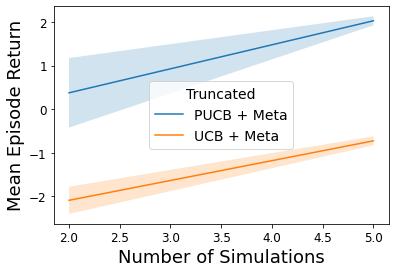

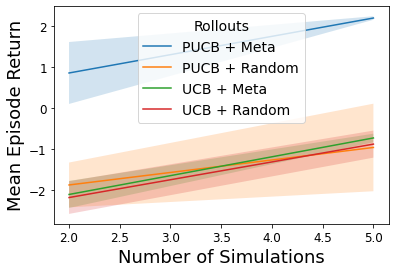

In [17]:
plot_kwargs = copy.deepcopy(return_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    # "ylim": (-0.3, 2.4),
})
plot_kwargs["legend_kwargs"].update({
    # "loc": "lower right",
    # "title": "Action Selection",  
})


for trunc in [True, False]:
    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        squeeze=True,
        subplot_kw=plot_kwargs["subplot_kwargs"],
    )
    if trunc:
        plot_kwargs["legend_kwargs"]["title"] = "Truncated"
    else:
        plot_kwargs["legend_kwargs"]["title"] = "Rollouts"
    
    plot_action_selection_vs_num_sims(
        act_sel_df[
            (act_sel_df["truncated"] == trunc)
        ],
        ax=ax,
        y_key="episode_return_mean",
        y_err_key="episode_return_CI",
        alg_id_key="alg_id",
        act_sel_key="action_selection",
        label_map=act_sel_label_map
    )
    ax.legend(**plot_kwargs["legend_kwargs"])
    fig.savefig(osp.join(figure_dir, f"act_sel_return_{alg_id}_trunc{trunc}.png"))
    
del plot_kwargs

## Comparison of truncation

Here we look at the performance of BAPOSGMCP using truncated and untruncated search.

We look at the final performance as well as search time.

We only look at performance with BAPOSGMCP using PUCB and the best meta-policy.

In [18]:
exp_df["truncated"].unique()

array([ True, False])

In [19]:
truncated_label_map = {
    True: "Value Function",
    False: "Rollout"
}

trunc_df = exp_df[
    (exp_df["action_selection"].isin(['pucb']))
    & (exp_df["meta_pi"].isin(["softmax", "NA"]))
    & (exp_df["alg_id"].isin(["baposgmcp"]))
]

print("Truncated values =", trunc_df["truncated"].unique())

trunc_alg_ids = trunc_df["alg_id"].unique().tolist()
trunc_alg_ids.sort()
print("Alg IDs")
print("-------")
for n in trunc_alg_ids:
    print(n)
    
policy_ids = trunc_df["policy_id"].unique().tolist()
policy_ids.sort()
print("\nPolicy IDs")
print("----------")
for n in policy_ids:
    print(n)

Truncated values = [False  True]
Alg IDs
-------
baposgmcp

Policy IDs
----------
baposgmcp_metasoftmax_numsims2_truncatedFalse
baposgmcp_metasoftmax_numsims2_truncatedTrue
baposgmcp_metasoftmax_numsims5_truncatedFalse
baposgmcp_metasoftmax_numsims5_truncatedTrue


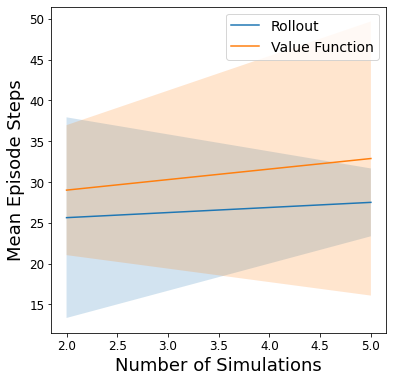

In [20]:
plot_kwargs = copy.deepcopy(step_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    # "ylim": (0, 50),
})
plot_kwargs["legend_kwargs"].update({
    # "loc": 'upper left',
    # "title": "Truncated",  
})

for alg_id in trunc_alg_ids:
    fig, _ = paper_utils.plot_multiple_truncated_vs_num_sims_by_alg(
        trunc_df[trunc_df["alg_id"] == alg_id],
        y_key="episode_steps_mean",
        y_err_key="episode_steps_CI",
        alg_id_key="alg_id",
        set_title=False,
        truncated_label_map=truncated_label_map,
        **plot_kwargs
    )
    fig.savefig(osp.join(figure_dir, f"truncated_steps_{alg_id}.png"))
    
del plot_kwargs

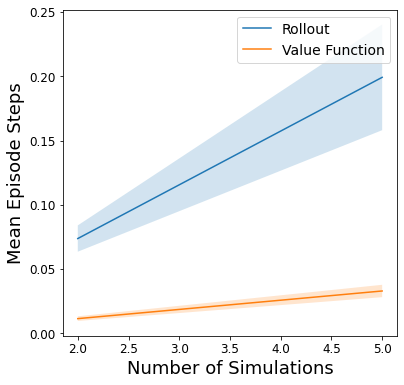

In [21]:
plot_kwargs = copy.deepcopy(step_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    # "ylim": (0, 50),
})
plot_kwargs["legend_kwargs"].update({
    # "loc": 'upper left',
    # "title": "Truncated",  
})

for alg_id in trunc_alg_ids:
    fig, _ = paper_utils.plot_multiple_truncated_vs_num_sims_by_alg(
        trunc_df[trunc_df["alg_id"] == alg_id],
        y_key="search_time_mean",
        y_err_key="search_time_CI",
        alg_id_key="alg_id",
        set_title=False,
        truncated_label_map=truncated_label_map,
        **plot_kwargs
    )
    fig.savefig(osp.join(figure_dir, f"truncated_search_time_{alg_id}.png"))
    
del plot_kwargs

## Comparing Meta-Policy versus no meta-policy

Here we look at the performance of BAPOSGMCP with a meta-policy against not using a meta-policy (i.e. using the different fixed policies).

Parameters:

- Truncated search (except for random)
- using PUCB

In [22]:
meta_vs_no_pi_label_map = {
    "baposgmcp_metasoftmax": r"$\sigma^{S}$",
    "baposgmcp-random": "Random",
    "baposgmcp-fixed_piklrk0seed0-v0": "K0", 
    "baposgmcp-fixed_piklrk1seed0-v0": "K1", 
    "baposgmcp-fixed_piklrk2seed0-v0": "K2",
    "baposgmcp-fixed_piklrk3seed0-v0": "K3",
    "baposgmcp-fixed_piklrk4seed0-v0": "K4"
}

# Use DF containing only policies with PUCB action_selection or NA
meta_vs_no_meta_df = exp_df[
    (exp_df["alg_id"].isin(["baposgmcp", "baposgmcp-fixed", "baposgmcp-random"]))
    & (exp_df["action_selection"].isin(["pucb"]))
    & (exp_df["meta_pi"].isin(["softmax", "NA"]))
    & (
        ((exp_df["alg_id"] == "baposgmcp-random") & (exp_df["truncated"] == False))
        | ((exp_df["alg_id"].isin(["baposgmcp", "baposgmcp-fixed"])) & (exp_df["truncated"] == True))
    )
]

meta_vs_no_meta_alg_ids = meta_vs_no_meta_df["alg_id"].unique().tolist()
meta_vs_no_meta_alg_ids.sort()
print("Alg IDs")
print("-------")
for n in meta_vs_no_meta_alg_ids:
    print(n)
    
policy_ids = meta_vs_no_meta_df["policy_id"].unique().tolist()
policy_ids.sort()
print("\nPolicy IDs")
print("----------")
for n in policy_ids:
    print(n)
    
fixed_policy_ids = meta_vs_no_meta_df["fixed_policy_id"].unique().tolist()
print("\nFixed Policy IDs")
print("----------------")
for n in fixed_policy_ids:
    print(n)

Alg IDs
-------
baposgmcp
baposgmcp-fixed
baposgmcp-random

Policy IDs
----------
baposgmcp-fixed_piklrk0seed0-v0_numsims2_truncatedTrue
baposgmcp-fixed_piklrk0seed0-v0_numsims5_truncatedTrue
baposgmcp-fixed_piklrk1seed0-v0_numsims2_truncatedTrue
baposgmcp-fixed_piklrk1seed0-v0_numsims5_truncatedTrue
baposgmcp-fixed_piklrk2seed0-v0_numsims2_truncatedTrue
baposgmcp-fixed_piklrk2seed0-v0_numsims5_truncatedTrue
baposgmcp-fixed_piklrk3seed0-v0_numsims2_truncatedTrue
baposgmcp-fixed_piklrk3seed0-v0_numsims5_truncatedTrue
baposgmcp-fixed_piklrk4seed0-v0_numsims2_truncatedTrue
baposgmcp-fixed_piklrk4seed0-v0_numsims5_truncatedTrue
baposgmcp-random_numsims2_truncatedFalse
baposgmcp-random_numsims5_truncatedFalse
baposgmcp_metasoftmax_numsims2_truncatedTrue
baposgmcp_metasoftmax_numsims5_truncatedTrue

Fixed Policy IDs
----------------
Driving14x14WideRoundAbout-n2-v0/klr_k0_seed0-v0
Driving14x14WideRoundAbout-n2-v0/klr_k1_seed0-v0
Driving14x14WideRoundAbout-n2-v0/klr_k2_seed0-v0
Driving14x14Wi

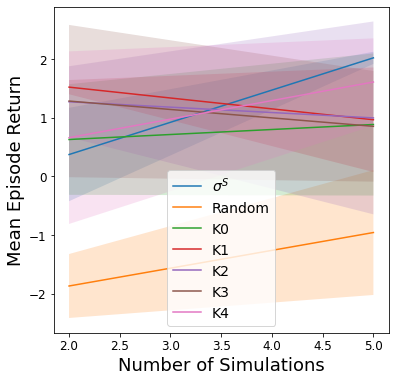

In [23]:
plot_kwargs = copy.deepcopy(return_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    # "ylim": (1.5, 2.25)
})
plot_kwargs["legend_kwargs"].update({
    # "loc": "lower right",
    # "title": "Policy" 
})

fig, _ = plot_utils.paper.plot_multiple_performance_vs_num_sims(
    meta_vs_no_meta_df,
    y_key="episode_return_mean",
    y_err_key="episode_return_CI",
    policy_prefixes=[list(meta_vs_no_pi_label_map)],
    pi_label_map=meta_vs_no_pi_label_map,
    **plot_kwargs,
)

fig.savefig(osp.join(figure_dir, f"meta_vs_fixed_return.png"))
    
del plot_kwargs

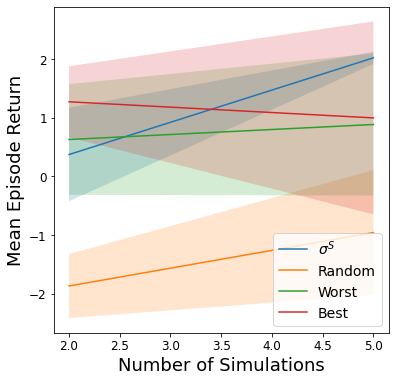

In [24]:
meta_vs_no_best_and_worst_pi_label_map = {
    "baposgmcp_metasoftmax": r"$\sigma^{S}$",
    "baposgmcp-random": "Random",
    "baposgmcp-fixed_piklrk0seed0-v0": "Worst", 
    # "baposgmcp-fixed_piklrk1seed0-v0": "K1", 
    "baposgmcp-fixed_piklrk2seed0-v0": "Best",
    # "baposgmcp-fixed_piklrk3seed0-v0": "K3",
    # "baposgmcp-fixed_piklrk4seed0-v0": "K4"
}

plot_kwargs = copy.deepcopy(return_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    # "ylim": (1.5, 2.25),
})
plot_kwargs["legend_kwargs"].update({
    "loc": "lower right",
    # "title": "Policy" 
})

fig, _ = plot_utils.paper.plot_multiple_performance_vs_num_sims(
    meta_vs_no_meta_df,
    y_key="episode_return_mean",
    y_err_key="episode_return_CI",
    policy_prefixes=[list(meta_vs_no_best_and_worst_pi_label_map)],
    pi_label_map=meta_vs_no_best_and_worst_pi_label_map,
    **plot_kwargs,
)

fig.savefig(osp.join(figure_dir, f"meta_vs_fixed_return_best_and_worst.png"))
    
del plot_kwargs

## Comparing BAPOSGMCP versus baselines

Finally we compare BAPOSGMCP versus baselines. Specifically we compare:

- BAPOSGMCP (PUCB + Best Meta)
- IPOMCP-Meta (UCB + Best Meta)
- IPOMCP (UCB + Random)
- Full Knowledge BR
- Meta

In [25]:
best_meta_pi = "softmax"
perf_df = exp_df[
    (exp_df["alg_id"] == "full-knowledge-br")
    | ((exp_df["alg_id"] == "metabaseline") & (exp_df["meta_pi"] == "softmax"))
    | ((exp_df["alg_id"] == "baposgmcp") & (exp_df["meta_pi"] == "softmax") & (exp_df["truncated"] == True))
    | ((exp_df["alg_id"] == "ucbmcp") & (exp_df["meta_pi"] == "softmax") & (exp_df["truncated"] == True))
    | ((exp_df["alg_id"] == "ucbmcp-random") & (exp_df["truncated"] == False))
]

policy_prefixes_to_plot = [
    "baposgmcp_metasoftmax",
    "metabaseline_softmax",
    "full-knowledge-br",
    "ucbmcp-random",
    "ucbmcp_metasoftmax"
]

baseline_pi_label_map = {
    "baposgmcp_metasoftmax": "BAPOSGMCP",
    "baposgmcp-random": "BAPOSGMCP Random", 
    "metabaseline_softmax": "Meta-Policy",
    "full-knowledge-br": "Best-Response",
    "ucbmcp_metasoftmax": "UCB + Meta",
    "ucbmcp-random": "UCB + Random"
}

perf_ids = perf_df["alg_id"].unique().tolist()
perf_ids.sort()
print("Alg IDs")
print("-------")
for n in perf_ids:
    print(n)
    
policy_ids = perf_df["policy_id"].unique().tolist()
policy_ids.sort()
print("\nPolicy IDs")
print("----------")
for n in policy_ids:
    print(n)

Alg IDs
-------
baposgmcp
full-knowledge-br
metabaseline
ucbmcp
ucbmcp-random

Policy IDs
----------
baposgmcp_metasoftmax_numsims2_truncatedTrue
baposgmcp_metasoftmax_numsims5_truncatedTrue
full-knowledge-br
metabaseline_softmax
ucbmcp-random_numsims2_truncatedFalse
ucbmcp-random_numsims5_truncatedFalse
ucbmcp_metasoftmax_numsims2_truncatedTrue
ucbmcp_metasoftmax_numsims5_truncatedTrue


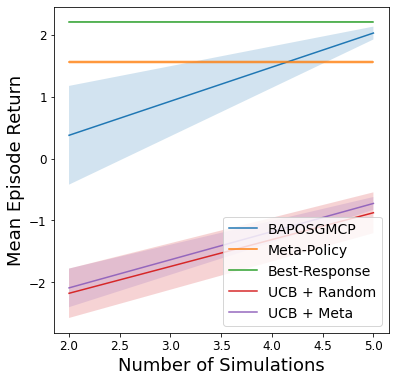

In [26]:
plot_kwargs = copy.deepcopy(return_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    # "ylim": (0.1, 2.3),
})
plot_kwargs["legend_kwargs"].update({
    "loc": "lower right",
})

fig, _ = plot_utils.paper.plot_multiple_performance_vs_num_sims(
    perf_df,
    y_key="episode_return_mean",
    y_err_key="episode_return_CI",
    policy_prefixes=[policy_prefixes_to_plot],
    pi_label_map=baseline_pi_label_map,
    **plot_kwargs,
)

fig.savefig(osp.join(figure_dir, "baselines_return.png"))
    
del plot_kwargs

# Analysis

Here we take a deeper dive into the characteristics of BA-POSGMCP. Specifically looking at:

1. Belief accuracy
2. Planning time


## Looking at Belief accuracy by steps

- action_dist_distance
- bayes_accuracy

In [27]:
belief_df = exp_df[
    (exp_df["alg_id"] == "baposgmcp") 
    & (exp_df["truncated"] == True)
    & (exp_df["action_selection"] == "pucb")
]

belief_alg_ids = belief_df["alg_id"].unique().tolist()
belief_alg_ids.sort()
print("Alg IDs")
print("-------")
for n in belief_alg_ids:
    print(n)

# group over meta-policy values
belief_group_keys = ["alg_id", "num_sims"]
belief_agg_dict = plot_utils.get_uniform_expected_agg_map(exp_df)
for k in belief_group_keys:
    if k in belief_agg_dict:
        belief_agg_dict.pop(k)
        
gb = belief_df.groupby(belief_group_keys)
gb_agg = gb.agg(**belief_agg_dict)
belief_gb_df = gb_agg.reset_index()

belief_gb_df.sort_values(by=["num_sims"], inplace=True)

print("Ungrouped size =", len(belief_df))
print("Grouped size =", len(belief_gb_df))

print("\nColumns")
print("-------")
for c in belief_gb_df.columns:
    print(c)

Alg IDs
-------
baposgmcp
Ungrouped size = 6
Grouped size = 2

Columns
-------
alg_id
num_sims
exp_id
exp_seed
agent_id
env_id
time_limit
episode_step_limit
discount
c_init
c_base
action_selection
dirichlet_alpha
root_exploration_fraction
reinvigorator
known_bounds
extra_particles_prop
step_limit
epsilon
policy_prior_map
meta_policy_dict
truncated
fixed_policy_id
coplayer_policy_id
meta_pi
num_episodes
num_episode_done
num_LOSS
num_DRAW
num_WIN
num_NA
episode_return_min
episode_discounted_return_min
episode_return_max
episode_discounted_return_max
action_dist_distance_0_mean
action_dist_distance_0_std
action_dist_distance_1_mean
action_dist_distance_1_std
action_dist_distance_0_0_mean
action_dist_distance_0_0_std
action_dist_distance_0_1_mean
action_dist_distance_0_1_std
action_dist_distance_0_2_mean
action_dist_distance_0_2_std
action_dist_distance_0_3_mean
action_dist_distance_0_3_std
action_dist_distance_0_4_mean
action_dist_distance_0_4_std
action_dist_distance_0_5_mean
action_dist

In [28]:
belief_plot_kwargs = copy.deepcopy(base_plot_kwargs)
belief_plot_kwargs["subplot_kwargs"].update({
    "xlabel": "Step",
})
belief_plot_kwargs["legend_kwargs"].update({
    "loc": "upper left",
    # "title": "Num. Sims." 
})

baposgmcp


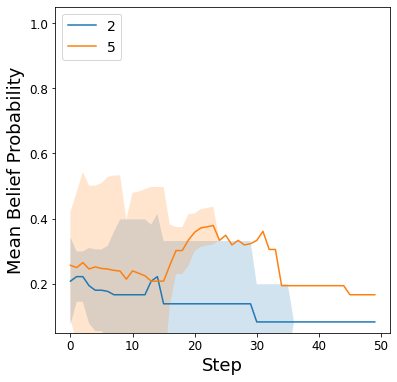

In [29]:
plot_kwargs = copy.deepcopy(belief_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    "ylabel": "Mean Belief Probability",
    "ylim": (0.05, 1.05),
})

for alg_id in belief_alg_ids:
    print(alg_id)
    fig, _ = plot_utils.paper.plot_multiple_belief_stats(
        belief_gb_df[belief_gb_df["alg_id"] == alg_id],
        y_key_prefix="bayes_accuracy",
        step_limit=50,
        other_agent_id=1,
        y_suffix="mean",
        y_err_suffix="CI",
        alg_id_key="alg_id",
        **plot_kwargs
    )

    fig.savefig(osp.join(figure_dir, f"bayes_accuracy_{alg_id}.png"))
    
del plot_kwargs

baposgmcp


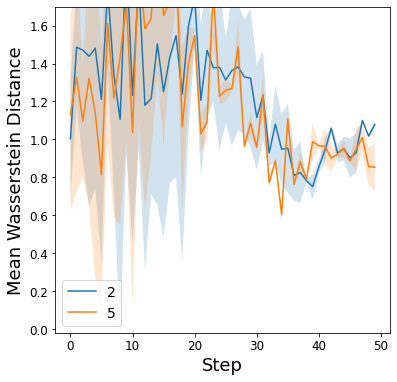

In [30]:
plot_kwargs = copy.deepcopy(belief_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    "ylabel": "Mean Wasserstein Distance",
    "ylim": (-0.02, 1.7),
})

plot_kwargs["legend_kwargs"].update({
    "loc": "lower left",
})

for alg_id in belief_alg_ids:
    print(alg_id)
    fig, _ = plot_utils.paper.plot_multiple_belief_stats(
        belief_gb_df[belief_gb_df["alg_id"] == alg_id],
        y_key_prefix="action_dist_distance",
        step_limit=50,
        other_agent_id=1,
        y_suffix="mean",
        y_err_suffix="CI",
        alg_id_key="alg_id",
        **plot_kwargs
    )

    fig.savefig(osp.join(figure_dir, f"action_dist_{alg_id}.png"))
    
del plot_kwargs

## Looking at time

   - search_time
   - update_time
   - reinvigoration_time
   - policy_calls
   - inference_time
   - search_depth

In [40]:
times_df = exp_df[
    (exp_df["action_selection"].isin(['pucb']))
    & (exp_df["alg_id"].isin(["baposgmcp"]))
    & (exp_df["meta_pi"] == "softmax")
]

print(times_df["truncated"].unique())

times_group_keys = ["alg_id", "truncated", "num_sims"]
times_agg_dict = plot_utils.get_uniform_expected_agg_map(exp_df)
for k in times_group_keys:
    if k in times_agg_dict:
        times_agg_dict.pop(k)
    
times_agg_dict["policy_id"] = pd.NamedAgg(column="policy_id", aggfunc="first")
        
gb = times_df.groupby(times_group_keys)
gb_agg = gb.agg(**times_agg_dict)
times_gb_df = gb_agg.reset_index()

times_gb_df.sort_values(by=["alg_id", "truncated", "num_sims"], inplace=True)

print("Ungrouped size =", len(times_df))
print("Grouped size =", len(times_gb_df))

times_alg_ids = times_gb_df["alg_id"].unique().tolist()
times_alg_ids.sort()
print("Alg IDs")
print("-------")
for n in times_alg_ids:
    print(n)
    
times_policy_ids = times_gb_df["policy_id"].unique().tolist()
times_policy_ids.sort()
print("\nPolicy IDs")
print("----------")
for n in times_policy_ids:
    print(n)
    
    
# based on output of policy IDs (since we group IDS)
time_pi_label_map = {
    "baposgmcp_metasoftmax": r"BAPOSGMCP",
}

sim_policies = [
    "baposgmcp_metasoftmax",
]

[False  True]
Ungrouped size = 4
Grouped size = 4
Alg IDs
-------
baposgmcp

Policy IDs
----------
baposgmcp_metasoftmax_numsims2_truncatedFalse
baposgmcp_metasoftmax_numsims2_truncatedTrue
baposgmcp_metasoftmax_numsims5_truncatedFalse
baposgmcp_metasoftmax_numsims5_truncatedTrue


baposgmcp


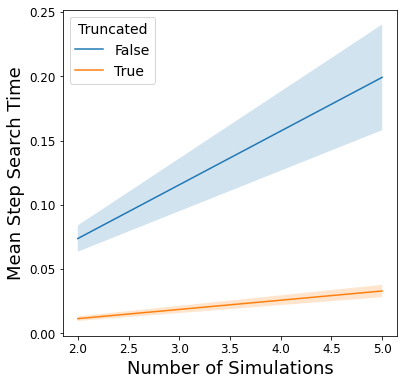

In [46]:
time_plot_kwargs = copy.deepcopy(return_plot_kwargs)
time_plot_kwargs["subplot_kwargs"].update({
    "ylabel": "Mean Step Search Time",
    # "ylim": (0, 75),
})
time_plot_kwargs["legend_kwargs"].update({
    "loc": 'upper left',
    "title": "Truncated",  
})

for alg_id in times_alg_ids:
    print(alg_id)
    fig, _ = paper_utils.plot_multiple_truncated_vs_num_sims_by_alg(
        times_gb_df[times_gb_df["alg_id"] == alg_id],
        y_key="search_time_mean",
        y_err_key="search_time_CI",
        alg_id_key="alg_id",
        set_title=False,
        **time_plot_kwargs
    )
    fig.savefig(osp.join(figure_dir, f"search_time_{alg_id}.png"))
    
del time_plot_kwargs

baposgmcp


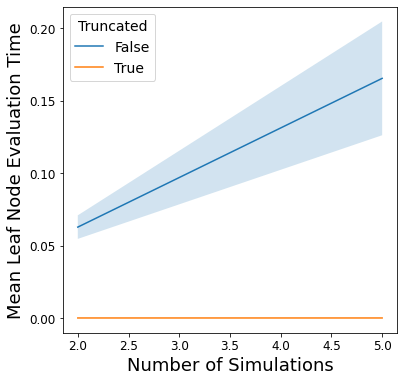

In [47]:
time_plot_kwargs = copy.deepcopy(return_plot_kwargs)
time_plot_kwargs["subplot_kwargs"].update({
    "ylabel": "Mean Leaf Node Evaluation Time",
    # "ylim": (0, 75),
})
time_plot_kwargs["legend_kwargs"].update({
    "loc": 'upper left',
    "title": "Truncated",  
})

for alg_id in times_alg_ids:
    print(alg_id)
    fig, _ = paper_utils.plot_multiple_truncated_vs_num_sims_by_alg(
        times_gb_df[times_gb_df["alg_id"] == alg_id],
        y_key="evaluation_time_mean",
        y_err_key="evaluation_time_CI",
        alg_id_key="alg_id",
        set_title=False,
        **time_plot_kwargs
    )
    fig.savefig(osp.join(figure_dir, f"eval_time_{alg_id}.png"))
    
del time_plot_kwargs

baposgmcp


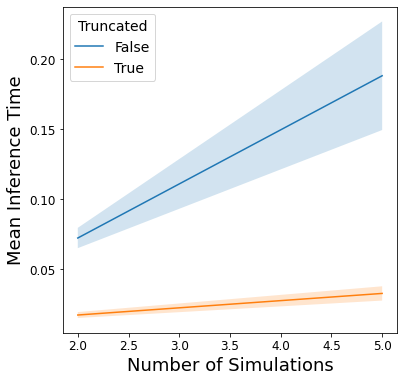

In [48]:
time_plot_kwargs = copy.deepcopy(return_plot_kwargs)
time_plot_kwargs["subplot_kwargs"].update({
    "ylabel": "Mean Inference Time",
    # "ylim": (0, 75),
})
time_plot_kwargs["legend_kwargs"].update({
    "loc": 'upper left',
    "title": "Truncated",  
})

for alg_id in times_alg_ids:
    print(alg_id)
    fig, _ = paper_utils.plot_multiple_truncated_vs_num_sims_by_alg(
        times_gb_df[times_gb_df["alg_id"] == alg_id],
        y_key="inference_time_mean",
        y_err_key="inference_time_CI",
        alg_id_key="alg_id",
        set_title=False,
        **time_plot_kwargs
    )
    fig.savefig(osp.join(figure_dir, f"inference_time_{alg_id}.png"))
    
del time_plot_kwargs

baposgmcp


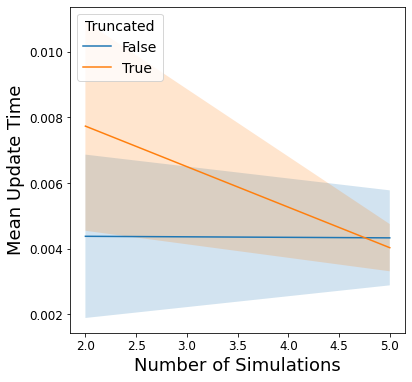

In [49]:
time_plot_kwargs = copy.deepcopy(return_plot_kwargs)
time_plot_kwargs["subplot_kwargs"].update({
    "ylabel": "Mean Update Time",
    # "ylim": (0, 75),
})
time_plot_kwargs["legend_kwargs"].update({
    "loc": 'upper left',
    "title": "Truncated",  
})

for alg_id in times_alg_ids:
    print(alg_id)
    fig, _ = paper_utils.plot_multiple_truncated_vs_num_sims_by_alg(
        times_gb_df[times_gb_df["alg_id"] == alg_id],
        y_key="update_time_mean",
        y_err_key="update_time_CI",
        alg_id_key="alg_id",
        set_title=False,
        **time_plot_kwargs
    )
    fig.savefig(osp.join(figure_dir, f"update_time_{alg_id}.png"))
    
del time_plot_kwargs

baposgmcp


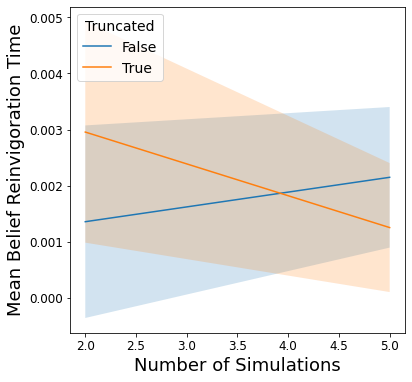

In [50]:
time_plot_kwargs = copy.deepcopy(return_plot_kwargs)
time_plot_kwargs["subplot_kwargs"].update({
    "ylabel": "Mean Belief Reinvigoration Time",
    # "ylim": (0, 75),
})
time_plot_kwargs["legend_kwargs"].update({
    "loc": 'upper left',
    "title": "Truncated",  
})

for alg_id in times_alg_ids:
    print(alg_id)
    fig, _ = paper_utils.plot_multiple_truncated_vs_num_sims_by_alg(
        times_gb_df[times_gb_df["alg_id"] == alg_id],
        y_key="reinvigoration_time_mean",
        y_err_key="reinvigoration_time_CI",
        alg_id_key="alg_id",
        set_title=False,
        **time_plot_kwargs
    )
    fig.savefig(osp.join(figure_dir, f"reinvigoration_time_{alg_id}.png"))
    
del time_plot_kwargs

baposgmcp


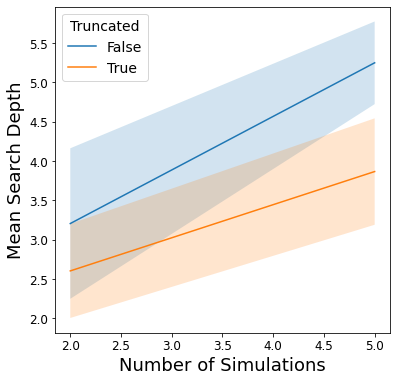

In [52]:
time_plot_kwargs = copy.deepcopy(return_plot_kwargs)
time_plot_kwargs["subplot_kwargs"].update({
    "ylabel": "Mean Search Depth",
    # "ylim": (0, 75),
})
time_plot_kwargs["legend_kwargs"].update({
    "loc": 'upper left',
    "title": "Truncated",  
})

for alg_id in times_alg_ids:
    print(alg_id)
    fig, _ = paper_utils.plot_multiple_truncated_vs_num_sims_by_alg(
        times_gb_df[times_gb_df["alg_id"] == alg_id],
        y_key="search_depth_mean",
        y_err_key="search_depth_CI",
        alg_id_key="alg_id",
        set_title=False,
        **time_plot_kwargs
    )
    fig.savefig(osp.join(figure_dir, f"search_depth_{alg_id}.png"))
    
del time_plot_kwargs